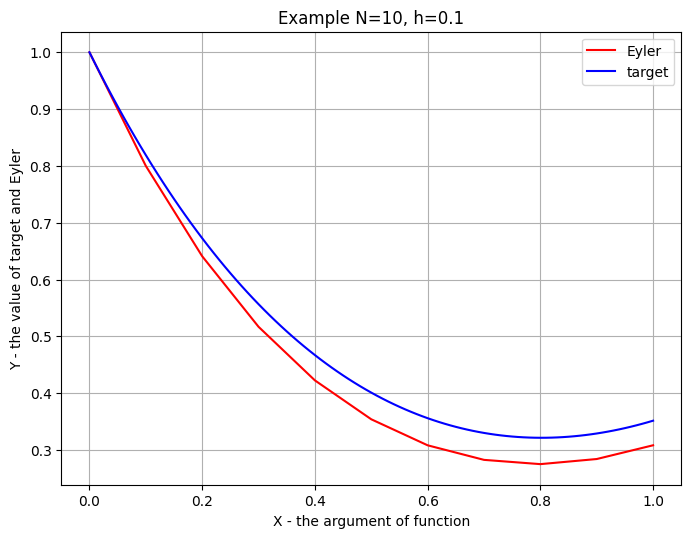

In [49]:
import matplotlib.pyplot
import math

def fun(n, h, x_0, y_0, der): #метод эйлера
    X = [x_0]
    Y = [y_0]
    for i in range(n):
        y_0 += h * der(x_0, y_0)
        x_0 += h
        X.append(x_0)
        Y.append(y_0)
    return X, Y

def target(a, n, h, val): #вычисление значений функции, которую приближаем
    X = [a]
    Y = [val(a)]
    for i in range(n):
        a += h
        X.append(a)
        Y.append(val(a))
    return X, Y

def derivative(x, y): #y' = derivative(x, y)
    return x**2 - 2*y

def target_value(x):
    return (3*math.exp(-2*x) + 2*x**2 - 2*x + 1) / 4
    

matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


#рисуем приближение
x, y = fun(10, 0.1, 0, 1, derivative)
matplotlib.pyplot.plot(x, y, 'r-', label='Eyler')

#рисуем приближаемую функцию
x_1, y_1 = target(0, 100, 0.01, target_value)
matplotlib.pyplot.plot(x_1, y_1, 'b-', label='target')

matplotlib.pyplot.title('Example N=10, h=0.1')
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of target and Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [50]:
def rungeKutta(n, h, x_0, y_0, der):
    X = [x_0]
    Y = [y_0]
    for i in range(n):
        k_1 = der(x_0, y_0)
        k_2 = der(x_0 + h / 2, y_0 + h * k_1 / 2)
        k_3 = der(x_0 + h / 2, y_0 + h * k_2 / 2)
        k_4 = der(x_0 + h, y_0 + h * k_3)
        y_0 += (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        x_0 += h
        X.append(x_0)
        Y.append(y_0)
    return X, Y

def error(target, method_names, method_results):
    print("|{:^8}|{:^8}|{:^24}|".format("i", "x_i", "значение y_i"), end="")
    for i in range(len(method_names)):
        print("{:^16}|{:^16}|".format(method_names[i], "Погрешность"), end="")
    print()
    for i in range(len(target[0])):
        print("|{:^8}|{:^8.6g}|{:^24.6g}|".format(i, target[0][i], target[1][i]), end="")
        for j in range(len(method_results)):
            print("{:^16.6g}|{:^16.6g}|".format(
                method_results[j][1][i], abs(target[1][i] - method_results[j][1][i])), end="")
        print()

error(target(0, 10, 0.1, target_value), ["Метод Эйлера", "Рунге-Кутты"],
      [fun(10, 0.1, 0, 1, derivative), rungeKutta(10, 0.1, 0, 1, derivative)])

|   i    |  x_i   |      значение y_i      |  Метод Эйлера  |  Погрешность   |  Рунге-Кутты   |  Погрешность   |
|   0    |   0    |           1            |       1        |       0        |       1        |       0        |
|   1    |  0.1   |        0.819048        |      0.8       |   0.0190481    |    0.819051    |  2.76852e-06   |
|   2    |  0.2   |        0.67274         |     0.641      |    0.03174     |    0.672745    |  4.68442e-06   |
|   3    |  0.3   |        0.556609        |     0.5168     |   0.0398087    |    0.556615    |  5.96582e-06   |
|   4    |  0.4   |        0.466997        |    0.42244     |   0.0445567    |    0.467004    |   6.7798e-06   |
|   5    |  0.5   |        0.40091         |    0.353952    |   0.0469576    |    0.400917    |  7.25372e-06   |
|   6    |  0.6   |        0.355896        |    0.308162    |   0.0477341    |    0.355903    |  7.48412e-06   |
|   7    |  0.7   |        0.329948        |    0.282529    |   0.0474184    |    0.329955    | 

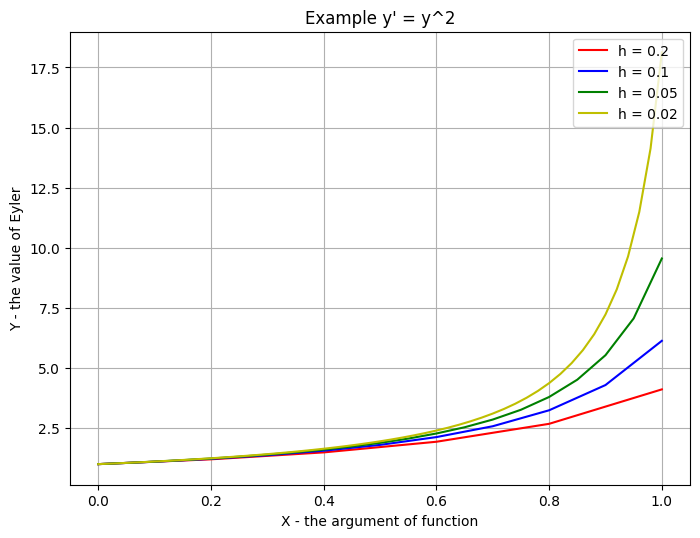

In [51]:
def derivative1(x, y):
    return y**2

matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

#рисуем приближение
x, y = fun(5, 0.2, 0, 1, derivative1) #n = 5, h = 0.2
matplotlib.pyplot.plot(x, y, 'r-', label='h = 0.2')

x, y = fun(10, 0.1, 0, 1, derivative1) #n = 10, h = 0.1
matplotlib.pyplot.plot(x, y, 'b-', label='h = 0.1')

x, y = fun(20, 0.05, 0, 1, derivative1) #n = 20, h = 0.05
matplotlib.pyplot.plot(x, y, 'g-', label='h = 0.05')

x, y = fun(50, 0.02, 0, 1, derivative1) #n = 50, h = 0.02
matplotlib.pyplot.plot(x, y, 'y-', label='h = 0.02')

matplotlib.pyplot.title('Example y\' = y^2')
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [52]:
x, y = fun(5, 0.2, 0, 1, derivative1) #n = 5, h = 0.2
print("h = 0.2")
error([x, y], [], [])
print("--------------------------------------------")
print()

x, y = fun(10, 0.1, 0, 1, derivative1) #n = 10, h = 0.1
print("h = 0.1   y(1) =", y[10])
#error([x[10:], y[10:]], [], [])
print("--------------------------------------------")
print()

x, y = fun(20, 0.05, 0, 1, derivative1) #n = 20, h = 0.05
print("h = 0.05   y(1) =", y[20])
#error([x[10:], y[10:]], [], [])
print("--------------------------------------------")
print()


x, y = fun(50, 0.02, 0, 1, derivative1) #n = 50, h = 0.02
print("h = 0.02   y(1) =", y[50])
#error([x[10:], y[10:]], [], [])
print("--------------------------------------------")
print()


h = 0.2
|   i    |  x_i   |      значение y_i      |
|   0    |   0    |           1            |
|   1    |  0.2   |          1.2           |
|   2    |  0.4   |         1.488          |
|   3    |  0.6   |        1.93083         |
|   4    |  0.8   |        2.67645         |
|   5    |   1    |        4.10912         |
--------------------------------------------

h = 0.1   y(1) = 6.128898403006593
--------------------------------------------

h = 0.05   y(1) = 9.552668020989639
--------------------------------------------

h = 0.02   y(1) = 18.128500191947307
--------------------------------------------



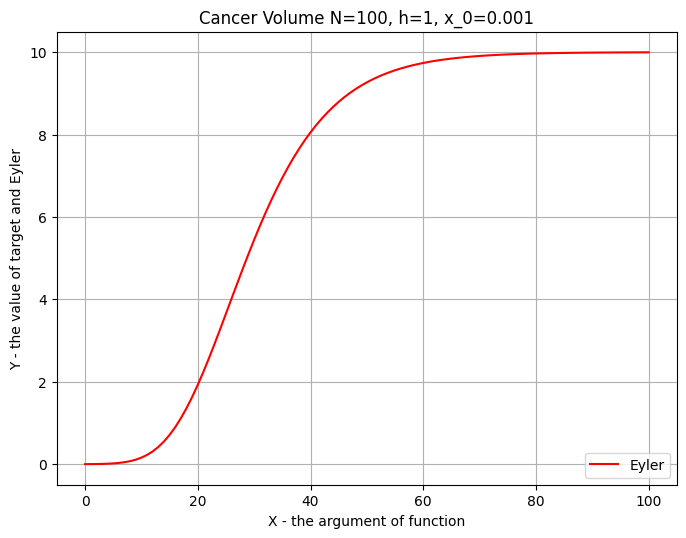

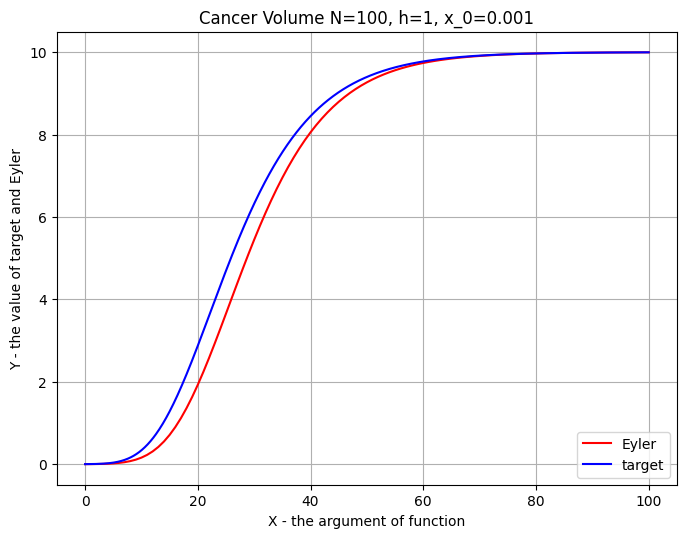

In [53]:
def ArtDerivative(a, k, x_0, t, V_t): #y' = ArtDerivative()
    return a * math.log(k / V_t) * V_t

def CancerVolume(a, k, x_0, t): #приближаемая функция
    return k * math.exp(math.log(x_0 / k) * math.exp(-a*t))

matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x, y = fun(100, 1, 0, CancerVolume(a=0.1, k=10, x_0=0.001, t=0), lambda x, y: ArtDerivative(a=0.1, k=10, x_0=0.001, t=x, V_t=y))
matplotlib.pyplot.plot(x, y, 'r-', label='Eyler')

matplotlib.pyplot.title('Cancer Volume N=100, h=1, x_0=0.001')
matplotlib.pyplot.legend(loc='lower right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of target and Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
matplotlib.pyplot.plot(x, y, 'r-', label='Eyler')
x_can, y_can = target(0, 1000, 0.1, lambda t: CancerVolume(a=0.1, k=10, x_0=0.001, t=t))
matplotlib.pyplot.plot(x_can, y_can, 'b-', label='target')

matplotlib.pyplot.title('Cancer Volume N=100, h=1, x_0=0.001')
matplotlib.pyplot.legend(loc='lower right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of target and Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

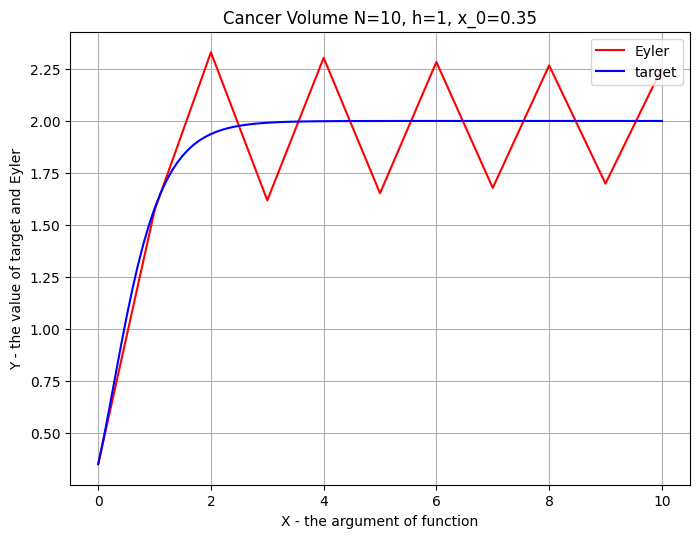

In [54]:
#другие параметры приближения
matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x, y = fun(10, 1, 0, CancerVolume(a=2, k=2, x_0=0.35, t=0), lambda x, y: ArtDerivative(a=2, k=2, x_0=0.35, t=x, V_t=y))
matplotlib.pyplot.plot(x, y, 'r-', label='Eyler')

x_can, y_can = target(0, 100, 0.1, lambda t: CancerVolume(a=2, k=2, x_0=0.35, t=t))
matplotlib.pyplot.plot(x_can, y_can, 'b-', label='target')

matplotlib.pyplot.title('Cancer Volume N=10, h=1, x_0=0.35')
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of target and Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

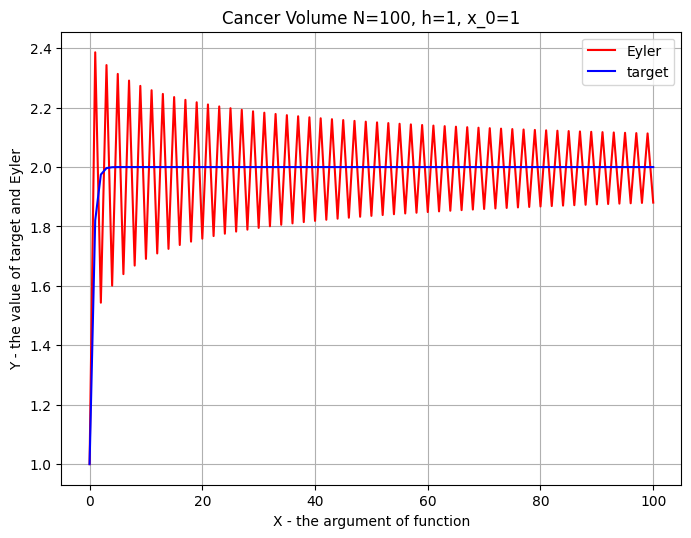

In [55]:
#другие параметры приближения
matplotlib.pyplot.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x, y = fun(100, 1, 0, CancerVolume(a=2, k=2, x_0=1, t=0), lambda x, y: ArtDerivative(a=2, k=2, x_0=1, t=x, V_t=y))
matplotlib.pyplot.plot(x, y, 'r-', label='Eyler')

x_can, y_can = target(0, 100, 1, lambda t: CancerVolume(a=2, k=2, x_0=1, t=t))
matplotlib.pyplot.plot(x_can, y_can, 'b-', label='target')

matplotlib.pyplot.title('Cancer Volume N=100, h=1, x_0=1')
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("X - the argument of function")
matplotlib.pyplot.ylabel("Y - the value of target and Eyler")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()